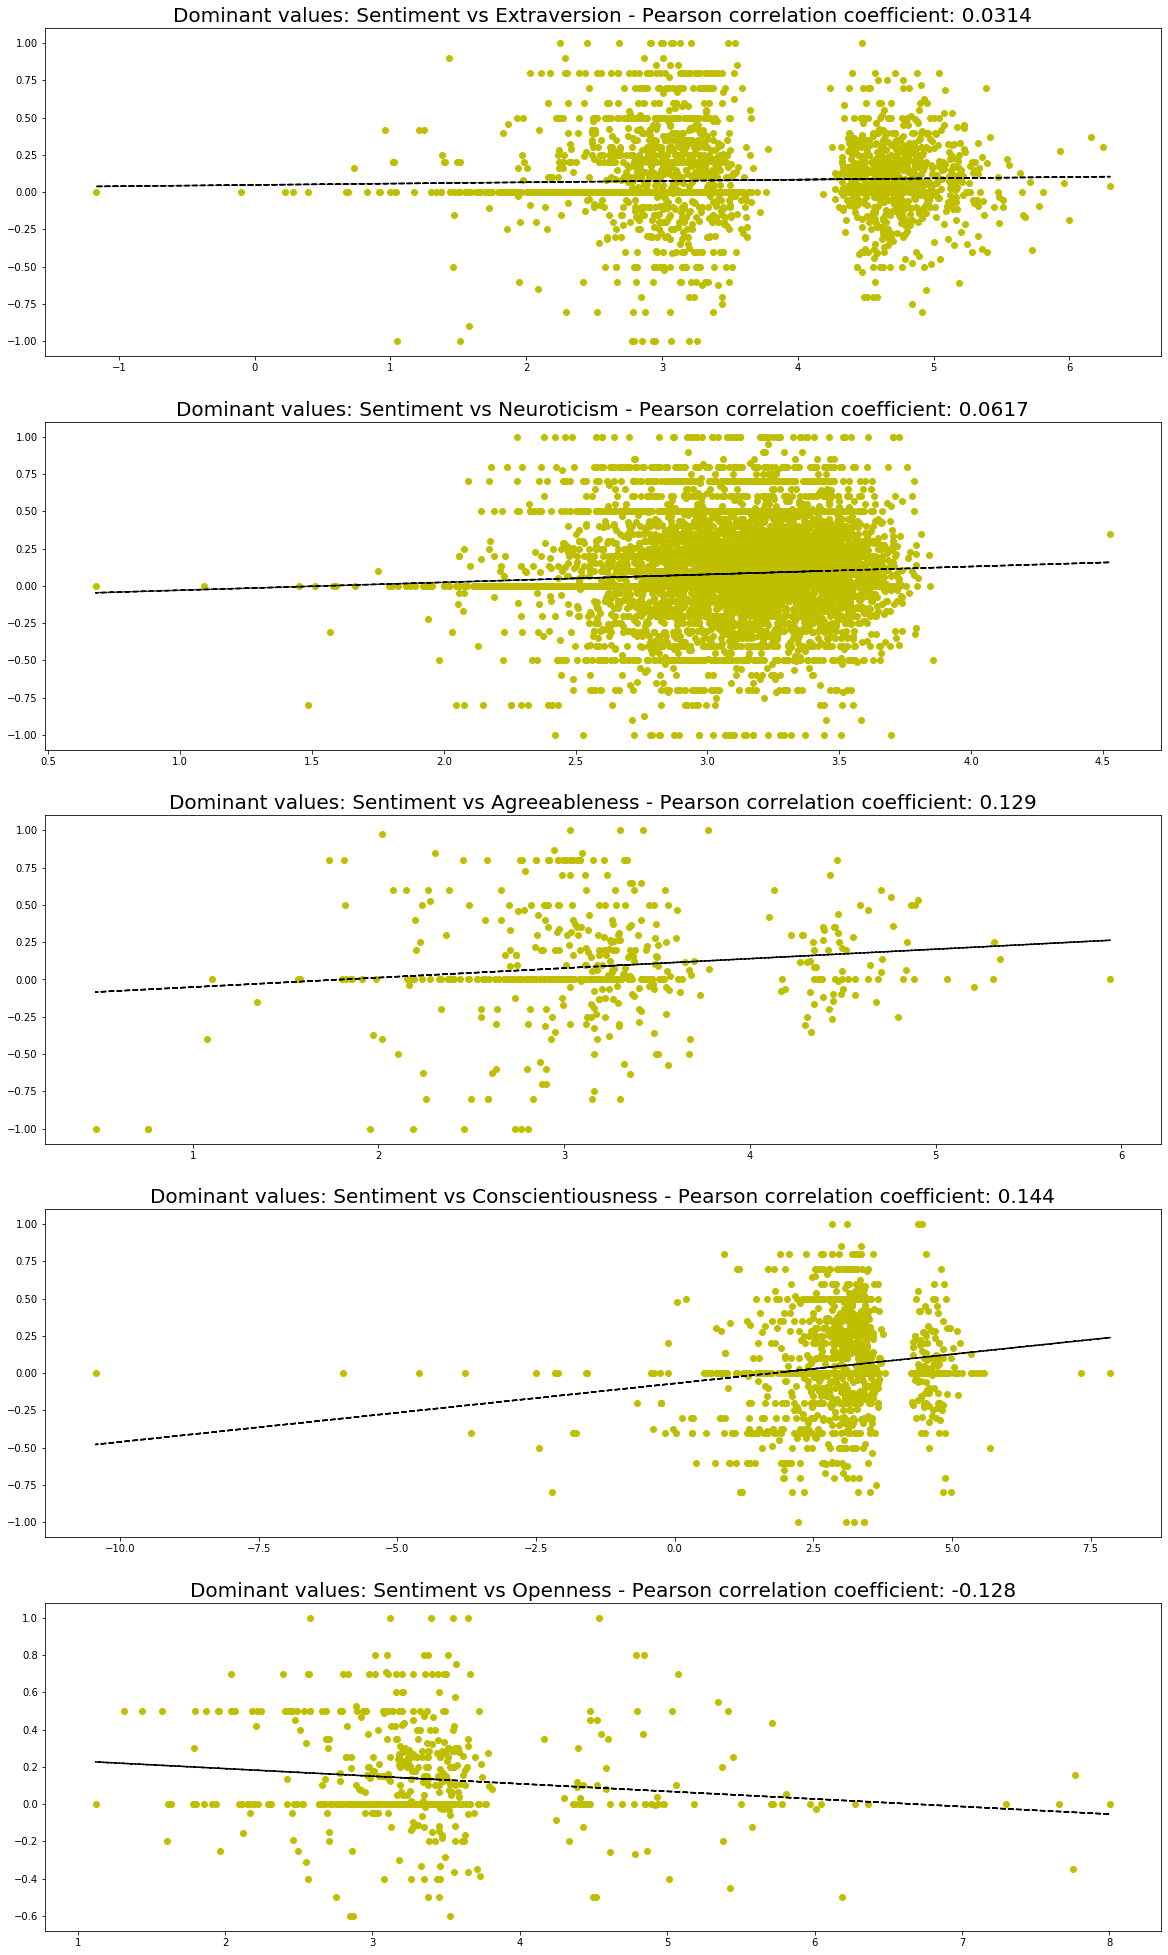

In [3]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5)
fig.set_figheight(35)
fig.set_figwidth(20)

def toFloat(array):
    floatArray = []
    for n in array:
        floatArray.append(float(n))
    return floatArray 

def importValues(account):
    filename = 'Plottable_files/' + account + '_plottable.txt'
    with open(filename) as f:
        lines = f.readlines()
        ex = [line.split()[0] for line in lines]
        ne = [line.split()[1] for line in lines]
        ag = [line.split()[2] for line in lines]
        co = [line.split()[3] for line in lines]
        op = [line.split()[4] for line in lines]
                
        ex = toFloat(ex)
        ne = toFloat(ne)
        ag = toFloat(ag)
        co = toFloat(co)
        op = toFloat(op)
        
        return ex, ne, ag, co, op

def importDominantValues(account):
    filename = 'Plottable_files/' + account + '_plottable.txt'
    dominantValues = []
    dominantValueIndexes = []
    
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            line = list(line.split())
            values = []
            for i in line:
                i = float(i)             
                if line.index(str(i)) == 1: # reverse neuroticism scale 
                    i = (4 - i) + 4
                absv = abs(4-i)
                values.append(absv)
            domValue = max(values)
            dominantValues.append(float(line[values.index(domValue)])) # get actual values
            dominantValueIndexes.append(int(values.index(domValue))) # get indexes

        return dominantValues, dominantValueIndexes

def calculateOccurrences(dominantValues):
    occurrences = [0,0,0,0,0]
    for n in dominantValues:
        if n == 1:
            occurrences[0] = occurrences[0] + 1
        if n == 2:
            occurrences[1] = occurrences[1] + 1
        if n == 3:
            occurrences[2] = occurrences[2] + 1
        if n == 4:
            occurrences[3] = occurrences[3] + 1
        if n == 5:
            occurrences[4] = occurrences[4] + 1
    
    return occurrences

def importSentiments(account):
    if account == 'accounts':
        # account average sentiment values, manually inserted
        # in order: JennyENicholson, FoldableHuman, 9_volt_, YingjueChen, marinscos
        return [0.07290293397772363,0.059272667101601055,0.07183810897814513,0.11832244656682922,0.07532620285226624]
    else:
        sentiments = []
        filename = 'CSVs/' + account + '.csv'
        with open(filename, newline='', encoding='utf8') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                try:
                    sentiments.append(float(row[4]))
                except ValueError:
                    continue
        sentiments = list(reversed(sentiments))
    return sentiments

def pearsonCorCoef(sentiments, array):
    return np.corrcoef(sentiments, array)[0, 1]
    
def pccForAccount(sentiments, ex, ne, ag, co, op):
    pc_ex = pearsonCorCoef(sentiments, ex)
    pc_ne = pearsonCorCoef(sentiments, ne)
    pc_ag = pearsonCorCoef(sentiments, ag)
    pc_co = pearsonCorCoef(sentiments, co)
    pc_op = pearsonCorCoef(sentiments, op)
    return pc_ex, pc_ne, pc_ag, pc_co, pc_op

def fitPolynomial(x, y):
    coef = np.polyfit(x,y,1)
    poly1d_fn = np.poly1d(coef)    
    return poly1d_fn(x)
    

def plotResults(sentiments, ex, ne, ag, co, op, account):
    #fig.set_figheight(35)
    #fig.set_figwidth(15)
    #pearson correlation coefficient values
    titleName = ['JennyENicholson', 'FoldableHuman', '9_volt_', 'YingjueChen', 'marinscos', 'Accounts']
    if account == 'jennyenicholson':
        tn = titleName[0]
    if account == 'foldablehuman':
        tn = titleName[1]
    if account == '9volt':
        tn = titleName[2]
    if account == 'yingjuechen':
        tn = titleName[3]
    if account == 'marinscos':
        tn = titleName[4]
    if account == 'accounts':
        tn = titleName[5]
        
    pc_ex, pc_ne, pc_ag, pc_co, pc_op = pccForAccount(sentiments, ex, ne, ag, co, op)

    axs[0].set_title(tn + ': ' + 'Sentiment vs Extraversion - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc_ex)), fontsize=20)
    axs[0].set_xlim([1, 7])
    axs[0].set_ylim([-1.1, 1.1]) # scale is from -1 to 1, added 0.1 for display purposes
    axs[1].set_title(tn + ': ' + 'Sentiment vs Neuroticism - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc_ne)), fontsize=20)
    axs[1].set_xlim([1, 7])
    axs[1].set_ylim([-1.1, 1.1])
    axs[2].set_title(tn + ': ' + 'Sentiment vs Agreeableness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc_ag)), fontsize=20)
    axs[2].set_xlim([1, 7])
    axs[2].set_ylim([-1.1, 1.1])
    axs[3].set_title(tn + ': ' + 'Sentiment vs Conscientiousness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc_co)), fontsize=20)
    axs[3].set_xlim([1, 7])
    axs[3].set_ylim([-1.1, 1.1])
    axs[4].set_title(tn + ': ' + 'Sentiment vs Openness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc_op)), fontsize=20)
    axs[4].set_xlim([1, 7])
    axs[4].set_ylim([-1.1, 1.1])
        
    y = sentiments
    axs[0].plot(ex,y, 'yo', ex, fitPolynomial(ex, y), '--k')
    axs[1].plot(ne,y, 'yo', ne, fitPolynomial(ne, y), '--k')
    axs[2].plot(ag,y, 'yo', ag, fitPolynomial(ag, y), '--k')
    axs[3].plot(co,y, 'yo', co, fitPolynomial(co, y), '--k')
    axs[4].plot(op,y, 'yo', op, fitPolynomial(op, y), '--k')

def rejectOutliers1(data):
    mean = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    for i in range(np.size(data)):
        if (data[i] < mean - 3 * sd):
            data[i] = 'x';
        elif (data[i] > mean + 3 * sd):
            data[i] = 'x';

    return data

def rejectOutliers2(data):
    sdata = data
    sdata.sort()
    q1 = np.size(sdata) / 4
    Q1 = sdata[int(q1)]
    q3 = (3 * np.size(sdata)) / 4
    Q3 = sdata[int(q3)]
    IQR = Q3 - Q1
    for i in range(np.size(data)):
        if (data[i] < (Q1-1.5 * IQR)):
            data[i] = 'x';
        elif (data[i] > (Q3+1.5 * IQR)):
            data[i] = 'x';
    return data

def removeOutlierSentiments(data, sentiments):
    temp1 = []
    temp2 = []
    for i in data:
        n = data.index(i)
        if i != 'x':
            temp1.append(data[n])
            temp2.append(sentiments[n])
            
    data = temp1
    sentiments = temp2
    return data, sentiments

def plotPCCForAccount(account):
    
    ex, ne, ag, co, op = importValues(account)
    sentiments = importSentiments(account)
    plotResults(sentiments, ex, ne, ag, co, op, account)

    #data = ex
    #data = rejectOutliers1(data)
    #data = rejectOutliers2(data)
    """
    #if outliers are rejected, array size changes
    #to scatter plot sentiments against dominant values,
    #outlier sentiments need to be deleted from sentiment-array
    #data, sentiments = removeOutlierSentiments(data, sentiments

    x = dominantValues
    y = sentiments
    pc = pearsonCorCoef(sentiments, data)
    axs[5].scatter(dominantValues, sentiments)
    axs[5].plot(x,y, 'yo', x, fitPolynomial(x, y), '--k')
    axs[5].title.set_text('Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)))
    """

def plotDominants():
    dex = [] 
    dex_sents = []
    dne = [] 
    dne_sents = []
    dag = [] 
    dag_sents = []
    dco = [] 
    dco_sents = []
    dop = [] 
    dop_sents = []
    
    accounts = ['9volt', 'foldablehuman', 'jennyenicholson', 'marinscos', 'yingjuechen']
    for account in accounts:
        ex = [] # extraversion
        ne = [] # neuroticism
        ag = [] # agreeableness    
        co = [] # conscientiousness
        op = [] # openness

        dominantValues = []
        dominantValueIndexes = []
        occurrences = []

        dominantValues, dominantValueIndexes = importDominantValues(account)
        sentiments = importSentiments(account)

        c = 0
        for v, i in zip(dominantValues, dominantValueIndexes):
            if i == 0:
                dex.append(v)
                dex_sents.append(sentiments[c])
            if i == 1:
                dne.append(v)
                dne_sents.append(sentiments[c])
            if i == 2:
                dag.append(v)
                dag_sents.append(sentiments[c])
            if i == 3:
                dco.append(v)
                dco_sents.append(sentiments[c])
            if i == 4:
                dop.append(v)
                dop_sents.append(sentiments[c])
            c = c + 1;


    # plot dominants
    pc = pearsonCorCoef(dex_sents, dex)
    axs[0].set_title('Dominant values: ' + 'Sentiment vs Extraversion - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)), fontsize=20)
    axs[0].plot(dex,dex_sents, 'yo', dex, fitPolynomial(dex, dex_sents), '--k')
    pc = pearsonCorCoef(dne_sents, dne)
    axs[1].set_title('Dominant values: ' + 'Sentiment vs Neuroticism - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)), fontsize=20)
    axs[1].plot(dne,dne_sents, 'yo', dne, fitPolynomial(dne, dne_sents), '--k')
    pc = pearsonCorCoef(dag_sents, dag)
    axs[2].set_title('Dominant values: ' + 'Sentiment vs Agreeableness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)), fontsize=20)
    axs[2].plot(dag,dag_sents, 'yo', dag, fitPolynomial(dag, dag_sents), '--k')
    pc = pearsonCorCoef(dco_sents, dco)
    axs[3].set_title('Dominant values: ' + 'Sentiment vs Conscientiousness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)), fontsize=20)
    axs[3].plot(dco,dco_sents, 'yo', dco, fitPolynomial(dco, dco_sents), '--k')
    pc = pearsonCorCoef(dop_sents, dop)
    axs[4].set_title('Dominant values: ' + 'Sentiment vs Openness - Pearson correlation coefficient: ' + str('{0:.3g}'.format(pc)), fontsize=20)
    axs[4].plot(dop,dop_sents, 'yo', dop, fitPolynomial(dop, dop_sents), '--k')

    # occurrences as an array, index represents personality trait (ex,ne,ag,co,op)
    #occurrences = calculateOccurrences(dominantValues)

    
def main():
    # plot PCC for a single account over each personality trait
    #accounts = ['9volt', 'foldablehuman', 'jennyenicholson', 'marinscos', 'yingjuechen', 'accounts']
    account = '9volt'
    #plotPCCForAccount(account)
    
    # plot PCC with dominant values only over all accounts
    plotDominants()
    
if __name__ == "__main__":
    main()
    


